# Eigen Face

In [1]:
import os
import numpy as np
from PIL import Image
#Read image path into list
all_path = []
for root,d_names,f_names in os.walk('.'):
    for f in f_names:
        full_path = os.path.join(root, f)
        if full_path.endswith('.pgm'): all_path += [full_path]

#Generate column-wize normalized image matrix, pass in list of image path
def ReadAndNorm(all_path):
    
    Face_Matrix = np.empty((0,10304), int)    
    for iamge_path in all_path:        
        img = Image.open(iamge_path).convert('L')
        imagearray = np.array(img)
        original_shape = imagearray.shape
        flat = imagearray.ravel()
        facevector = np.matrix(flat)
        #Row_wize face matrix
        Face_Matrix = np.r_[Face_Matrix, facevector]
        
    #Take transpose so each column is an image
    Face_Matrix = Face_Matrix.T
    #get mean face
    mean_face = Face_Matrix.sum(axis=1)/Face_Matrix.shape[1]
    #Normalize face
    Norm_Face_Matrix = Face_Matrix - mean_face      
    
    return Face_Matrix, Norm_Face_Matrix, mean_face, original_shape

___, Norm_Face_Matrix, mean_face, original_shape = ReadAndNorm(all_path)

Norm_Face_Matrix.shape #10304 pixels per image x 400 images

(10304, 400)

In [63]:
original_shape

(112, 92)

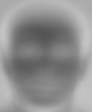

In [45]:
#see one of the normalized face
mean_face_reshape = np.asarray(mean_face).reshape(original_shape).astype('uint8') * 255
mean_face_reshape_iamge = Image.fromarray(mean_face_reshape, 'L')
mean_face_reshape_iamge.save("MEAN_Face.jpg")
mean_face_reshape_iamge

In [44]:
print(Norm_Face_Matrix)

[[-46.825  -51.825  -25.825  ...  26.175   25.175   24.175 ]
 [-41.7775 -51.7775 -25.7775 ...  23.2225  28.2225  26.2225]
 [-33.1375 -53.1375 -24.1375 ...  29.8625  25.8625  26.8625]
 ...
 [-47.88   -39.88   -44.88   ...  16.12    11.12    15.12  ]
 [-49.87   -35.87   -41.87   ...  12.13    10.13    11.13  ]
 [-46.25   -42.25   -41.25   ...  16.75    16.75    14.75  ]]


In [3]:
#Get Coveriance matrix
Norm_Face_Matrix_t = np.transpose(Norm_Face_Matrix)
CovMatrix = np.matmul(Norm_Face_Matrix_t, Norm_Face_Matrix)
print("The covar matrix is\n", CovMatrix)
CovMatrix.shape

The covar matrix is
 [[20002331.49939375  8500528.92439375 11248780.48189375 ...
  -4536546.18560625 -2796522.69810625 -4145164.07310625]
 [ 8500528.92439375 19805875.34939375 10876732.90689375 ...
  -4860916.76060625 -2380296.27310625 -2443799.64810625]
 [11248780.48189375 10876732.90689375 26970225.46439374 ...
  -2818203.20310625 -2964414.71560625 -3337893.09060625]
 ...
 [-4536546.18560625 -4860916.76060625 -2818203.20310625 ...
  12405035.12939375  5937340.61689375  4866623.24189375]
 [-2796522.69810625 -2380296.27310625 -2964414.71560625 ...
   5937340.61689375 10424938.10439375  6702262.72939375]
 [-4145164.07310625 -2443799.64810625 -3337893.09060625 ...
   4866623.24189375  6702262.72939375 11941678.35439375]]


(400, 400)

In [61]:
#Get eigen vector and eigen value
evals,evects = np.linalg.eig(CovMatrix)
print("The eigenvalues are\n", evals[:5], "...")
print("The eigenvectors are\n", evects[:5], "...")
np.savetxt('eigenvalues.txt', evals)
np.savetxt('eigenvectors.txt', evects, delimiter=',')

The eigenvalues are
 [1.12570301e+09 8.25390350e+08 4.36716260e+08 3.57230059e+08
 3.27166296e+08] ...
The eigenvectors are
 [[ 8.00730079e-02  1.30700548e-02  4.74960735e-02 ... -4.49330313e-02
   4.27946634e-03  1.04316119e-05]
 [ 7.79699105e-02  3.29159061e-02  4.69369104e-02 ...  1.84142101e-02
   1.15554979e-02 -2.84580002e-02]
 [ 8.87250827e-02  2.67873072e-02 -2.33880153e-02 ... -1.09119471e-02
  -4.51866990e-02 -3.66230540e-02]
 [ 3.38281665e-02  2.93231196e-02 -7.52733798e-02 ... -3.02904689e-02
   2.12547900e-02  2.48893755e-02]
 [ 9.64207756e-02  4.05354597e-02 -7.86651313e-03 ...  8.07939409e-02
  -3.11432497e-02 -1.47876474e-02]] ...


In [5]:
#Are the result of first 30 eigen values sorted?
sorted(evals, reverse = True )[:30] == evals[:30] #Looks like it!

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

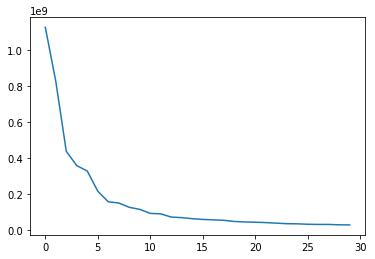

In [66]:
import matplotlib.pyplot as plt
plt.plot(evals[:30])
plt.show() #looks like they are sorted already!

In [7]:
#What's the biggest eigen value?
evals[0]

1125703013.9396787

In [8]:
#What's the corresponding eigen vector?
evects[0]

matrix([[ 8.00730079e-02,  1.30700548e-02,  4.74960735e-02,
          3.02239954e-03,  5.78064471e-02,  7.36501357e-02,
         -3.65115902e-02,  2.14374842e-02,  9.55954000e-02,
          8.25579079e-02,  5.63457663e-02, -5.84802987e-02,
         -5.36511804e-02, -1.21317728e-02,  5.81314573e-02,
          7.60000005e-02,  5.85553010e-02,  5.87073882e-02,
          1.66252098e-02, -5.48307766e-02, -2.08504756e-02,
         -2.96451686e-02,  2.05533543e-02, -6.50964648e-02,
          1.47856502e-02,  2.29158748e-02,  9.66840694e-02,
         -7.24418972e-02,  7.31425728e-02, -3.63890811e-03,
          1.49622103e-02,  3.81514589e-02, -1.23377067e-02,
         -6.84339018e-02,  2.81880294e-02, -6.38934251e-02,
         -7.45650994e-02,  2.06766640e-02, -3.08643290e-02,
         -3.80920396e-02,  2.71413188e-02, -4.65917141e-02,
          2.02512821e-02, -3.55822022e-02,  6.33578702e-02,
          1.32652709e-01, -6.41433924e-02,  2.27485768e-02,
          6.13818742e-02, -5.29491569e-0

In [9]:
#Shape check for first eigen vector
evects[0].T.shape

(400, 1)

In [10]:
#Shape check for original normalized matrix
Norm_Face_Matrix.shape

(10304, 400)

In [33]:
#HAVE eigenface 0:
for i in range(30):  
    eig_i = np.matmul(Norm_Face_Matrix, np.transpose(evects[i]))
    eig_i_reshape = np.asarray(eig_i).reshape(original_shape).astype('uint8') * 255
    eig_i_img = Image.fromarray(eig_i_reshape, 'L')
    #eig0_img.show()
    eig_i_img.save("eig"+str(i)+".jpg")

In [64]:
#matrix of k eigen eigenvectors(eigenfaces matrix)
top30_eig_vecs = evects[:30]
eigenface_matrix = np.matmul(top30_eig_vecs, Norm_Face_Matrix.T)
print(eigenface_matrix.shape)

(30, 10304)


# Test 1

In [13]:
#Read in test vector
test_vec, ____, ___, ____ = ReadAndNorm([all_path[0]])
test_norm_vec = test_vec - mean_face
test_norm_vec.shape  

(10304, 1)

In [14]:
eig_proj = np.matmul(eigenface_matrix, test_norm_vec)
eig_proj.shape

(30, 1)

In [15]:
all_eig_proj = np.matmul(eigenface_matrix, Norm_Face_Matrix)
all_eig_proj.shape

(30, 400)

In [16]:
all_eig_proj.T[0]

matrix([[ 5454429.15330495, 13956385.47490918,  2098561.90861647,
           386009.33014646, -3180456.15760483,  -711900.20454443,
           783151.79436999,  3228599.74042368,   856500.82965745,
          4977959.63294311, 10298229.18084121,  4161985.22314524,
           248208.40548151,  1862244.48085166, 10709337.38377795,
          7388164.50340081,   215208.7571912 , -4096665.54357427,
          3919177.699533  , -1331356.15267892,  -416860.54906074,
         -6362419.32840368,  5242190.97827729, -2939907.92742525,
         -5016913.29680836, -6611030.29473942,  7098165.25216724,
          7299124.99293134, -2248178.8747069 , -4846081.2036372 ]])

In [17]:
eig_proj.T #Looks the same!

matrix([[ 5454429.15330494, 13956385.47490919,  2098561.90861647,
           386009.33014646, -3180456.15760483,  -711900.20454443,
           783151.79436999,  3228599.74042368,   856500.82965745,
          4977959.63294311, 10298229.18084121,  4161985.22314524,
           248208.40548151,  1862244.48085166, 10709337.38377795,
          7388164.50340081,   215208.7571912 , -4096665.54357427,
          3919177.69953299, -1331356.15267892,  -416860.54906074,
         -6362419.32840368,  5242190.97827729, -2939907.92742525,
         -5016913.29680836, -6611030.29473942,  7098165.25216724,
          7299124.99293134, -2248178.8747069 , -4846081.2036372 ]])

In [18]:
#Let's compute the euclidean_distances
from sklearn.metrics.pairwise import euclidean_distances
[round(float(i), 2) for i in euclidean_distances(all_eig_proj.T, eig_proj.T)][:10] #it worked!

[0.0,
 13618728.39,
 20213906.1,
 24621675.39,
 21164827.42,
 22152256.96,
 15562756.49,
 11165893.14,
 16498005.34,
 19529965.61]

# TEST 2

In [19]:
#takind the first image out and replace it with the second image(.\\FACESdata\\s1\\1.pgm -->.\\FACESdata\\s1\\2.pgm)
all_path_test = all_path.copy()
all_path_test[0] = all_path[2]
all_path_test[:10] #See there are two 2.pgm in s1?

['.\\FACESdata\\s1\\2.pgm',
 '.\\FACESdata\\s1\\10.pgm',
 '.\\FACESdata\\s1\\2.pgm',
 '.\\FACESdata\\s1\\3.pgm',
 '.\\FACESdata\\s1\\4.pgm',
 '.\\FACESdata\\s1\\5.pgm',
 '.\\FACESdata\\s1\\6.pgm',
 '.\\FACESdata\\s1\\7.pgm',
 '.\\FACESdata\\s1\\8.pgm',
 '.\\FACESdata\\s1\\9.pgm']

In [20]:
#new eigenface matrix using dataset after replacement for test vector:
___, test_norm_face, test_mean_face, original_shape = ReadAndNorm(all_path_test)
test_norm_face.T[:5] #We can see that the first image and the 2rd image(3rd element in the list) are the same. 

matrix([[-25.8775, -25.8175, -24.16  , ..., -44.8875, -41.89  , -41.2625],
        [-51.8775, -51.8175, -53.16  , ..., -39.8875, -35.89  , -42.2625],
        [-25.8775, -25.8175, -24.16  , ..., -44.8875, -41.89  , -41.2625],
        [ 45.1225,  43.1825,  43.84  , ..., -25.8875, -27.89  , -20.2625],
        [-22.8775, -32.8175, -51.16  , ..., -35.8875, -65.89  , -51.2625]])

In [21]:
test_norm_face_t = np.transpose(test_norm_face)
CovMatrix_test = np.matmul(test_norm_face_t, test_norm_face)
CovMatrix_test.shape

(400, 400)

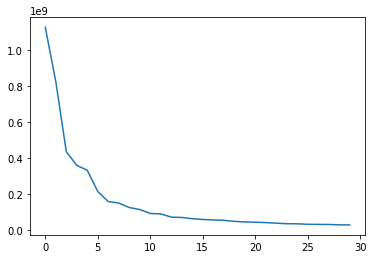

In [22]:
evals_test, evects_test = np.linalg.eig(CovMatrix_test)
plt.plot(evals_test[:30])
plt.show()#They are still well sorted!

In [23]:
#Test matrix of k eigen eigenvectors (Test eigenfaces matrix)
top30_eig_vecs_test = evects_test[:30]
eigenface_matrix_test = np.matmul(top30_eig_vecs_test, test_norm_face_t)
#We got our new TEST eigenface matrix! Now lets see if it recognize out test iamge. (first image)

In [65]:
eigenface_matrix_test

matrix([[ -5.75586222,  -3.97524173,  -5.18441766, ...,   0.46696848,
          10.52483181,  75.46590805],
        [ 34.9957851 ,  40.30182428,  31.67794313, ..., -33.47318585,
         -35.55193883, -76.57536378],
        [ 37.79535635,  33.39729941,  44.96842661, ...,   6.40136675,
          -0.42794594, -75.24166264],
        ...,
        [  3.38626611,  -4.04710001,  -2.65373841, ..., -12.89115118,
         -18.27624281, -18.39318583],
        [ -7.60248563,  -8.48290156,  -8.61602311, ..., -29.26906189,
         -25.87176964, -16.69417752],
        [-14.84241454, -22.89186163, -20.17341647, ...,  20.02706049,
          -3.38539478,   8.06464068]])

In [24]:
#Read in the first image that we removed and replaced from the database, normalize it with the new test mean face.
test_vec, ____, ___, ____ = ReadAndNorm([all_path[0]])
test_norm_vec = test_vec - test_mean_face
test_norm_vec

matrix([[-46.8775],
        [-41.8175],
        [-33.16  ],
        ...,
        [-47.8875],
        [-49.89  ],
        [-46.2625]])

In [25]:
test_eig_proj = np.matmul(eigenface_matrix_test, test_norm_vec)
test_eig_proj.shape

(30, 1)

In [26]:
all_eig_proj = np.matmul(eigenface_matrix_test, test_norm_face)
all_eig_proj.shape

(30, 400)

In [27]:
#Compute the euclidean_distances and find out which picture in database is cloest to the test image, hopefully from the 1st
test_distance = [round(float(i), 2) for i in euclidean_distances(all_eig_proj.T, test_eig_proj.T)]
predict_face_path = all_path_test[test_distance.index(min(test_distance))]
predict_face_path

'.\\FACESdata\\s1\\7.pgm'

In [28]:
all_path[0] #The model correctly predicted the test image as the first person!

'.\\FACESdata\\s1\\1.pgm'

<function matplotlib.pyplot.show(*args, **kw)>

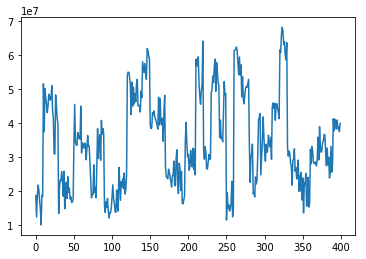

In [29]:
plt.plot(test_distance)
plt.show

<Container object of 40 artists>

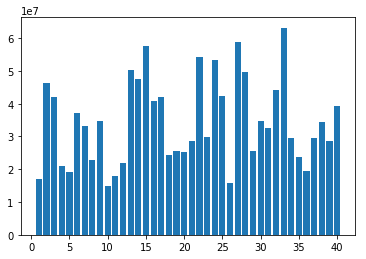

In [30]:
avg_distance = list(np.mean(np.array(test_distance).reshape(-1, 10), axis=1))
plt.bar(range(1, 41), avg_distance)

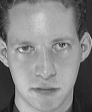

In [35]:
test_img = Image.open(all_path[0])
test_img.save("TEST_Image.jpg")
test_img

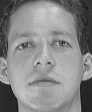

In [36]:
pred_img = Image.open(predict_face_path)
pred_img.save("PREDICTED_Image.jpg")
pred_img